In [19]:
# Initial imports

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import os
from pathlib import Path
%matplotlib inline



In [62]:
# Import CSV 2 data for Scipy k2 Cluster plot
csvpath = Path("../data/clean data/L & T2 - L & T.csv")
l_t_data = pd.read_csv(csvpath)


l_t_data = l_t_data.set_index("Type of Breach")

l_t_data



,Unnamed: 0,Year of Breach,Company Name,Total Records,Type of Organization
Type of Breach,,,,,
INSD,0,2008,GS Caltex,11100000,energy
STAT,1,2008,Stanford University,72000,EDU
STAT,2,2008,UK Home Office,84000,GOV
STAT,3,2008,UK Ministry of Defence,1700000,GOV
STAT,4,2008,University of Miami,2100000,EDU
...,...,...,...,...,...
HACK,6817,2016,MySpace,360000000,BSO
HACK,6818,2016,FriendFinder,412000000,BSO
HACK,6819,2016,Yahoo,500000000,BSO


In [63]:
# Slice Data To Keep Important Rows

l_t_data = l_t_data[['Company Name', 'Total Records', 'Type of Organization', 'Year of Breach']]

l_t_data

,Company Name,Total Records,Type of Organization,Year of Breach
Type of Breach,,,,
INSD,GS Caltex,11100000,energy,2008
STAT,Stanford University,72000,EDU,2008
STAT,UK Home Office,84000,GOV,2008
STAT,UK Ministry of Defence,1700000,GOV,2008
STAT,University of Miami,2100000,EDU,2008
...,...,...,...,...
HACK,MySpace,360000000,BSO,2016
HACK,FriendFinder,412000000,BSO,2016
HACK,Yahoo,500000000,BSO,2016


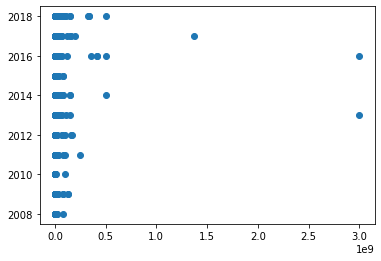

In [64]:
# Create a Scatter Plot

plt.scatter(l_t_data['Total Records'], l_t_data['Year of Breach'])

In [65]:
# Assign The Amount of Cluster for Sklearn to Sort

km = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [66]:
# Assign Y axis as our clustering rule for KM to assign Clusters

y_predicted = km.fit_predict(l_t_data[['Total Records', 'Year of Breach']])

y_predicted

array([0, 0, 0, ..., 2, 2, 1], dtype=int32)

In [67]:
# Append Cluster row into dataset

l_t_data['cluster'] = y_predicted
l_t_data

,Company Name,Total Records,Type of Organization,Year of Breach,cluster
Type of Breach,,,,,
INSD,GS Caltex,11100000,energy,2008,0
STAT,Stanford University,72000,EDU,2008,0
STAT,UK Home Office,84000,GOV,2008,0
STAT,UK Ministry of Defence,1700000,GOV,2008,0
STAT,University of Miami,2100000,EDU,2008,0
...,...,...,...,...,...
HACK,MySpace,360000000,BSO,2016,2
HACK,FriendFinder,412000000,BSO,2016,2
HACK,Yahoo,500000000,BSO,2016,2


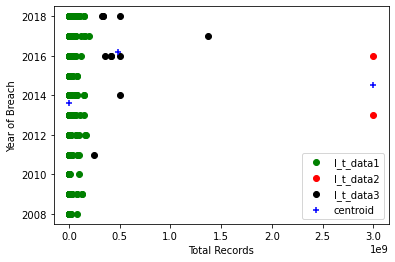

In [75]:
#Plot Cluster Centroids

l_t_data1 = l_t_data[l_t_data.cluster == 0]
l_t_data2 = l_t_data[l_t_data.cluster == 1]
l_t_data3 = l_t_data[l_t_data.cluster == 2]


plt.scatter(l_t_data1['Total Records'], l_t_data1['Year of Breach'], color='green', label='l_t_data1')
plt.scatter(l_t_data2['Total Records'], l_t_data2['Year of Breach'], color='red', label='l_t_data2')
plt.scatter(l_t_data3['Total Records'], l_t_data3['Year of Breach'], color='black', label='l_t_data3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='blue', marker='+', label='centroid')

plt.xlabel('Total Records')
plt.ylabel('Year of Breach')
plt.legend()
plt.savefig("scatter.png") #save fig